Empezamos plateando incompresibilidad, es decir:

$$ \overline{\rm ∇}\overline{\rm u} = 0 $$

Como trabajaremos con coordenadas esféricas debido a la simetría de nuestro sistema, expandimos:

$$  \overline{\rm ∇}\overline{\rm u} = \frac{1}{r^2} \frac{∂(r^2 u_r)}{∂r} = 0 $$

De esta última expresión podemos despejar una forma de $\overline{\rm u_r} $ (no utilizando constantes aditivas) al integrar resolviendo la ecuación diferencial:

$$  U_r(r,t) = \frac{C(t)}{r^2}   $$
Siendo $C$ una constante en función del tiempo que se puede definir utilizando la ecuación de contorno, es decir:

$$ \dot{R} = U_r = \frac{dR}{dt} $$
$$ C(T) =  \frac{dR}{dt} R^2 =  \frac{d}{dt}(\frac{R^3}{3}) = R^2 \dot{R} $$

Reemplazando en la ecuación de $U_r$, llego a la expresión para la velocidad del flujo:

$$ \overline{\rm U}(r,t) =  \frac{R^2 \dot{R}}{r^2} \hat{r} $$

# Perfil de presiones

Planteo la ecuación de Euler:
$$ \frac{D \overline{\rm u}}{Dt} = \frac{1}{\rho} \overline{\rm \nabla} P + \overline{\rm f}^{ ext}$$

Siendo que las fuerzas externas son nulas por consigna y que $\overline{\rm U}(r,t) = u_r \hat{r}$, puedo reescribir la última ecuación como:

$$ \frac{D \overline{\rm u}}{Dt} = \frac{∂\overline{\rm u}}{\partial t} + (\overline{\rm u} \cdot \overline{\rm \nabla}) \cdot u_r \hat{r}$$

Multiplicando versores nos queda:

$$ \frac{∂\overline{\rm u}}{\partial t} + u\frac{∂u}{∂r} \hat{r} = \frac{1}{\rho} \frac{∂P}{∂r} \hat{r}$$

Haciendo uso de la expresión de $\overline{\rm U}(r,t)$ encontrada en el anterior inciso, reemplazamos en la izquirda de la última expreción y derivamos usando la regla de la cadena. LLegamos a:

$$ \frac{2 R \dot{R}^2 + R^2 \ddot{R}}{r^2} -2 \frac{(R^2 \dot{R})^2}{r^5}= \frac{1}{\rho} \frac{∂P}{∂r}$$

Si integramos en r con los límites r:[r;$∞$):

$$ - \frac{2 R \dot{R}^2 + R^2 \ddot{R}}{r} + \frac{(R^2 \dot{R})^2}{2 r^4}= \frac{1}{\rho} (P(r,t) - P_∞)$$

La cual nos da una relación que nos brinda el perfil de presiones (P(r,t)) en función de la presión de el infinito (P_∞), r y el tiempo.

# Busco una forma diferencia para integrar

Empiezo tomando r = R en el resultado del último inciso, lo cual simplificará la expresión:

$$ - R \ddot{R} - \frac{3\dot{R}^2}{2}= \frac{1}{\rho} (P(r,t) - P_∞)$$

La cual, pasando el término de la derecha a la izquierda, nos da como resultado la ecuación diferencial propuesta en el enunciado:

$$ R \ddot{R} + \frac{3\dot{R}^2}{2} - \frac{1}{\rho} (P(r,t) - P_∞) = 0$$

Utilizando que $V_0$ y $P_0$ son datos y su producto se conserva, definimos la presión para R en función de ellos y el volumen en R:


$$ P_R = P_0 (\frac{V_0}{V_R})^n$$

La cual reemplazando por la fórmula del volumen de una esfera ($V(r) = \frac{4 \pi r^3}{3}$), llegamos a una expresión de la presión en R que sólo depende de la relación entre R y el radio inicial:

$$ P_R = P_0 (\frac{R_0}{R})^{3n}$$

Expresión la cual se puede insertar en la fórmula diferencial:

$$ R \ddot{R} + \frac{3\dot{R}^2}{2} - \frac{1}{\rho} (P_0 (\frac{R_0}{R})^{3n} - P_∞) = 0$$

Para adimensionalizar con este cambio de variables primero aplico regla de la cadena con las derivadas temporales a la nueva expresión R(t) y consigo una función ξ(t) (y su derivada temporal):

$$\dot{R} = R_0 \frac{df(ξ)}{dξ} \dot{ξ} $$
$$\ddot{R} = R_0 (\frac{df(ξ)}{dξ} \ddot{ξ}+ \frac{d^2f(ξ)}{dξ^2} \dot{ξ}^2) $$ $$ξ = t(\frac{\rho R_0^2}{P_∞})^{-1/2} $$
$$\dot{ξ} = \frac{\rho R_0^2}{P_∞}^{-1/2} $$

Al utilizar estas cuatro últimas expresiones en la ecuación diferencial ya obtenida, llegamos a:

$$ \frac{d^2f(ξ)}{dξ^2} f(ξ) + \frac{3}{2}(\frac{df(ξ)}{dξ})^2 - [\frac{β}{f^{3n}}-1] = 0 $$

Esta última expresión ya se puede integrar computacionalmente.


# Integro

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def rk4(x_i, frk, t_i, h, a):
  k_1 = frk(t_i, x_i, a)
  k_2 = frk(t_i + h/2, x_i + k_1 * h/2, a)
  k_3 = frk(t_i + h/2, x_i + k_2 * h/2, a)
  k_4 = frk(t_i + h, x_i + k_3 * h/2, a)
  return x_i + (h/6)*(k_1 + 2* k_2 + 2* k_3 + k_4)

def burb(t, u, params):
  n, beta = params
  x, v = u
  x_prima = v
  v_prima = - (3/2) * (v**2 / x) + (1/x) * ((beta/(x**(3 * n)))-1)
  return np.array([x_prima, v_prima])

def int_burb(u, burb, t_f, dt, m_params):
  global variables_x, variables_v

  m_X = [[] for _ in range(len(m_params))]
  m_V = [[] for _ in range(len(m_params))]


  for p in range(len(m_params)):
      for i in t_f:
          m_X[p].append(u[0])
          m_V[p].append(u[1])
          u = rk4(u, burb, i, dt, m_params[p])

  m_X = np.array(m_X)
  m_V = np.array(m_V)

  variables_x = {}
  variables_v = {}

  for i in range(len(m_params)):
      pos = "x" + str(i)
      vel = "v" + str(i)
      #print(pos)
      variables_x[pos] = m_X[i]
      variables_v[vel] = m_V[i]


# N = 1

In [ ]:
#CI sistema
u = np.array([1,0])
beta = 0.4


m_params = np.zeros((25, 2))

for fila in m_params:
    beta = beta + .1
    fila[0] = 1
    fila[1] = beta


#Cond. Integración

dt = .01
t = [0,10]
t_f = np.arange(t[0], t[1], dt)

colores = [
    '#FFEBEE', '#FFCDD2', '#EF9A9A', '#E57373', '#EF5350',
    '#F44336', '#E53935', '#D32F2F', '#C62828', '#B71C1C',
    '#FF8A80', '#FF5252', '#FF1744', '#D50000', '#FF3D00',
    '#FF6E40', '#FFAB40', '#FFD740', '#FFC400', '#FFD740',
    '#FFFF00', '#FFEA00', '#FFD600', '#FFC600', '#FFC107'
]

In [ ]:
int_burb(u, burb, t_f, dt, m_params)

In [ ]:
plt.figure(figsize=(25, 8))
plt.suptitle('Analísis burbuja esférica con n = 1', fontsize=16)


for i in range(len(m_params)):
    n = i + 1
    plt.plot(variables_x[f'x{i}'], variables_v[f'v{i}'], label=f'$beta = {m_params[i,1]}$', color=colores[i])
    plt.ylabel('Velocidad [V]', fontsize = 15)
    plt.xlabel('Posición [X]', fontsize = 15)
    plt.legend(fontsize=7)
    plt.grid(linestyle='--')
    plt.grid(which='minor', linestyle=':', linewidth='0.1', color='black')

plt.show()

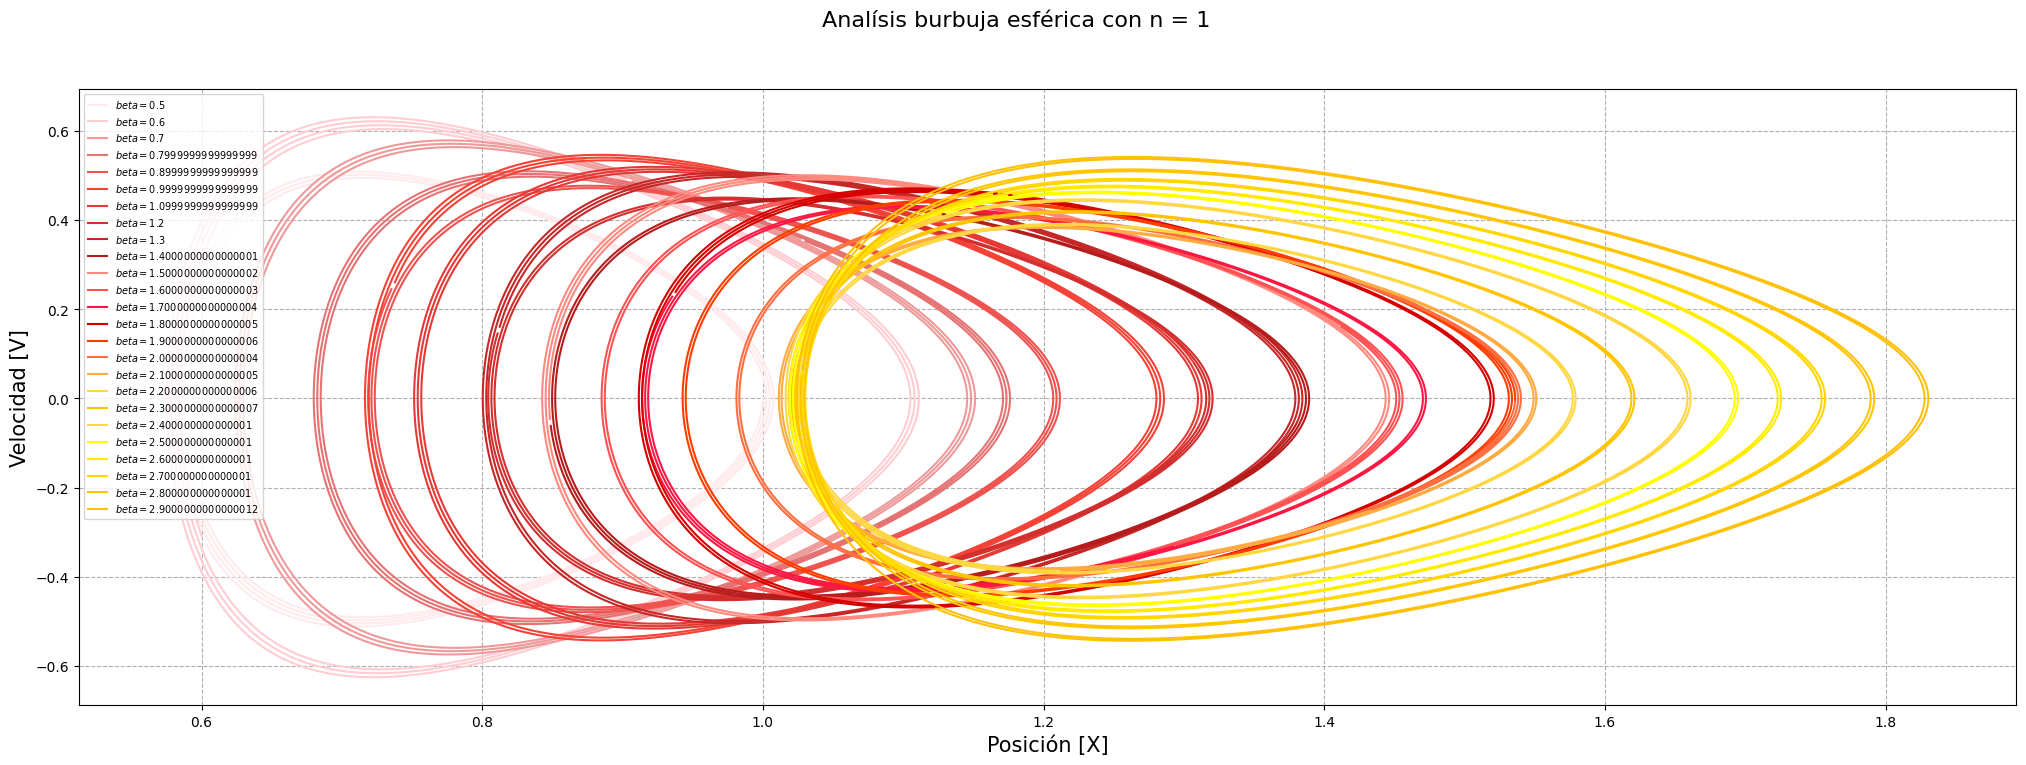

En este caso podemos ver un punto de equilibrio denotado por el óvalo cerrado que se dibuja en la mayoría de los retratos de fase. Lo que varía entre betas con respect al retrato de fase es su punto de equilibrio, ya que el óvalo se va trasladando, y el valor de ángulo acción (siendo proporcional al área).

In [ ]:
#CI sistema
u = np.array([1,0])
beta = 1


m_params = np.zeros((1, 2))

for fila in m_params:
    fila[0] = 1
    fila[1] = beta


#Cond. Integración

dt = .01
t = [0,10]
t_f = np.arange(t[0], t[1], dt)

int_burb(u, burb, t_f, dt, m_params)

plt.plot(variables_x["x0"], variables_v['v0'], label=f'$beta = 1$', color=colores[i])
plt.ylabel('Velocidad [V]', fontsize = 15)
plt.xlabel('Posición [X]', fontsize = 15)
plt.legend(fontsize=7)
plt.grid(linestyle='--')
plt.grid(which='minor', linestyle=':', linewidth='0.1', color='black')

plt.show()

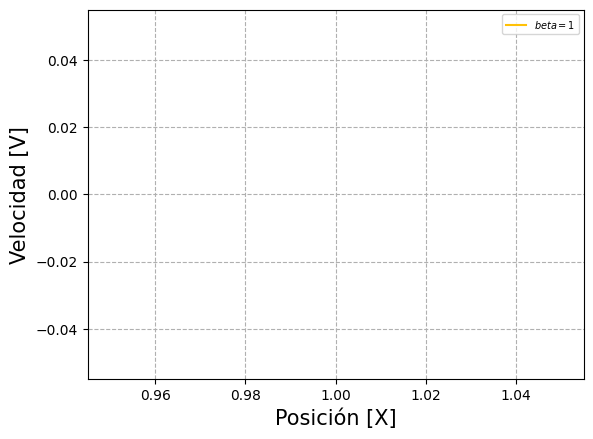

Bajo la condición de β = 1, también estamos imponiendo que p_0 = p_∞. Es decir que no estamos haciendo distinción del exterior y del interior dela burbuja, está todo bajo la misma presión por lo tanto no va a haber flujo. Por ende, su retrato de fase va a estar vacío.

# N = 1.4

In [ ]:
#CI sistema
u = np.array([1,0])
beta = 0.4


m_params = np.zeros((25, 2))

for fila in m_params:
    beta = beta + .1
    fila[0] = 1.4
    fila[1] = beta


#Cond. Integración

dt = .01
t = [0,10]
t_f = np.arange(t[0], t[1], dt)

colores = [
    '#E8F5E9', '#C8E6C9', '#A5D6A7', '#81C784', '#66BB6A',
    '#4CAF50', '#43A047', '#388E3C', '#2E7D32', '#1B5E20',
    '#B9F6CA', '#69F0AE', '#00E676', '#00C853', '#64DD17',
    '#76FF03', '#C6FF00', '#AEEA00', '#FFD600', '#FFC107',
    '#FFAB00', '#FF8F00', '#FF6D00', '#FF5722', '#E64A19'
]

In [ ]:
int_burb(u, burb, t_f, dt, m_params)

In [ ]:
plt.figure(figsize=(25, 8))
plt.suptitle('Analísis burbuja esférica con n = 1', fontsize=16)


for i in range(len(m_params)):
    n = i + 1
    plt.plot(variables_x[f'x{i}'], variables_v[f'v{i}'], label=f'$beta = {m_params[i,1]}$', color=colores[i])
    plt.ylabel('Velocidad [V]', fontsize = 15)
    plt.xlabel('Posición [X]', fontsize = 15)
    plt.legend(fontsize=7)
    plt.grid(linestyle='--')
    plt.grid(which='minor', linestyle=':', linewidth='0.1', color='black')

plt.show()

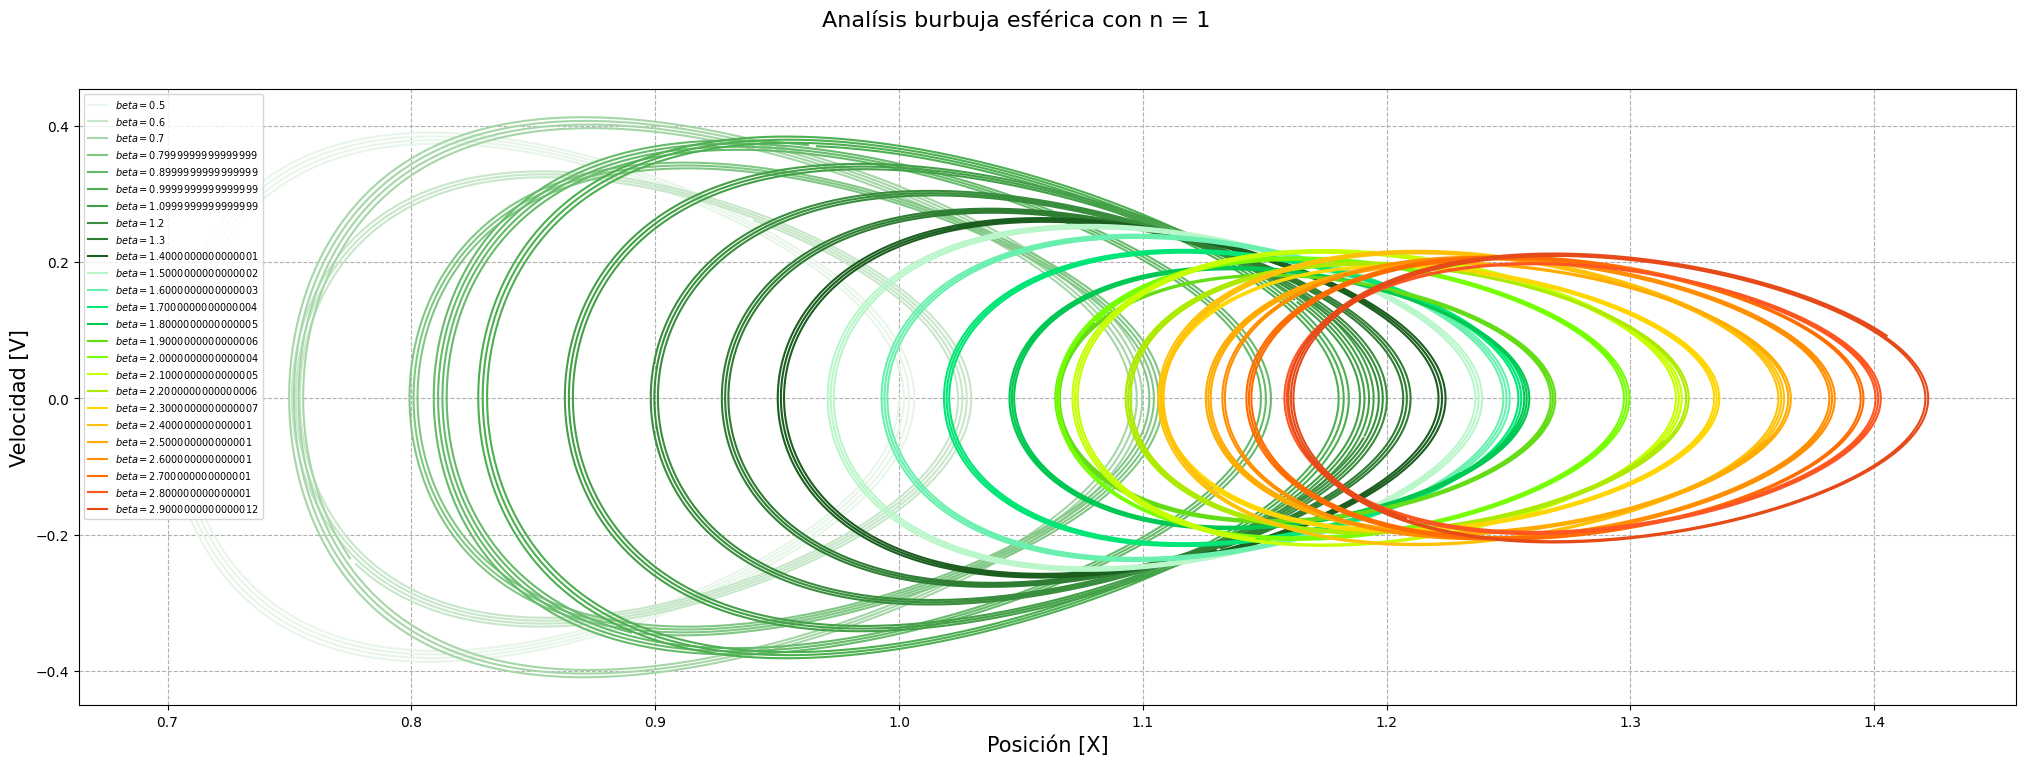

En este caso volvemos a tener un equilibrio estable dado por el dibujo ovalado del retrato de fase el cual varía de posición con el incremento de beta. Sin embargo hay que resaltar que en este caso se nota un decrecimiento de la variable acción ligada al área encerrada a medida que se incrementa β.

In [ ]:
#CI sistema
u = np.array([1,0])
beta = 1


m_params = np.zeros((1, 2))

for fila in m_params:
    fila[0] = 1.4
    fila[1] = beta


#Cond. Integración

dt = .01
t = [0,10]
t_f = np.arange(t[0], t[1], dt)

int_burb(u, burb, t_f, dt, m_params)

plt.plot(variables_x["x0"], variables_v['v0'], label=f'$beta = 1$', color=colores[i])
plt.ylabel('Velocidad [V]', fontsize = 15)
plt.xlabel('Posición [X]', fontsize = 15)
plt.legend(fontsize=7)
plt.grid(linestyle='--')
plt.grid(which='minor', linestyle=':', linewidth='0.1', color='black')

plt.show()

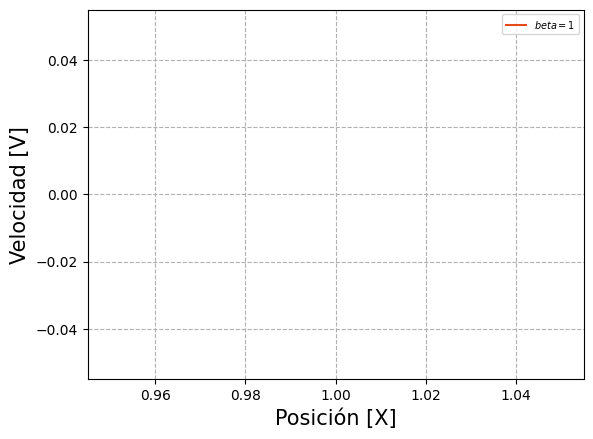

Mismo argumento que para n = 1 y β = 1.